Dataset Preview:
                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-09 00:00:00   376000.0       3.0       2.00         1340      1384   
1  2014-05-09 00:00:00   800000.0       4.0       3.25         3540    159430   
2  2014-05-09 00:00:00  2238888.0       5.0       6.50         7270    130017   
3  2014-05-09 00:00:00   324000.0       3.0       2.25          998       904   
4  2014-05-10 00:00:00   549900.0       5.0       2.75         3060      7015   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     3.0           0     0          3        1340              0      2008   
1     2.0           0     0          3        3540              0      2007   
2     2.0           0     0          3        6420            850      2010   
3     2.0           0     0          3         798            200      2007   
4     1.0           0     0          5        1600           1460      1979   

   yr_renovated      

C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


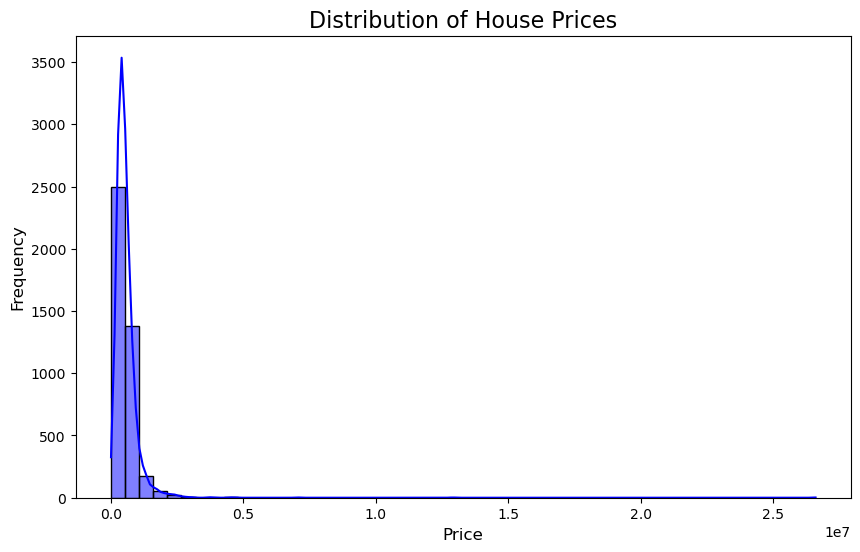

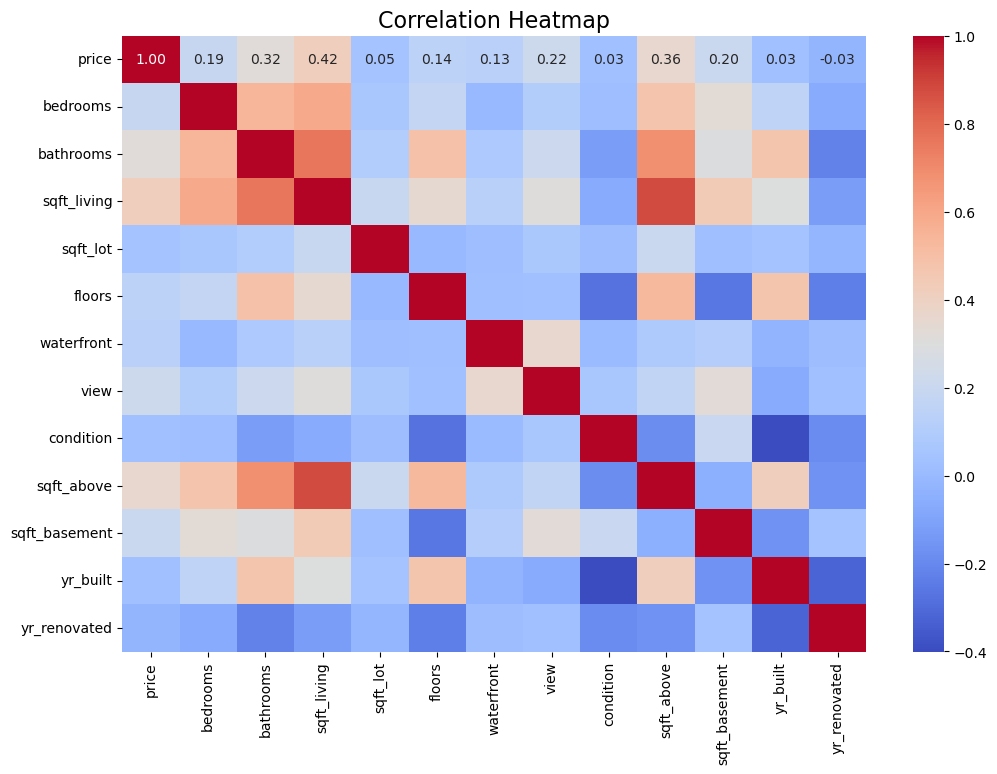

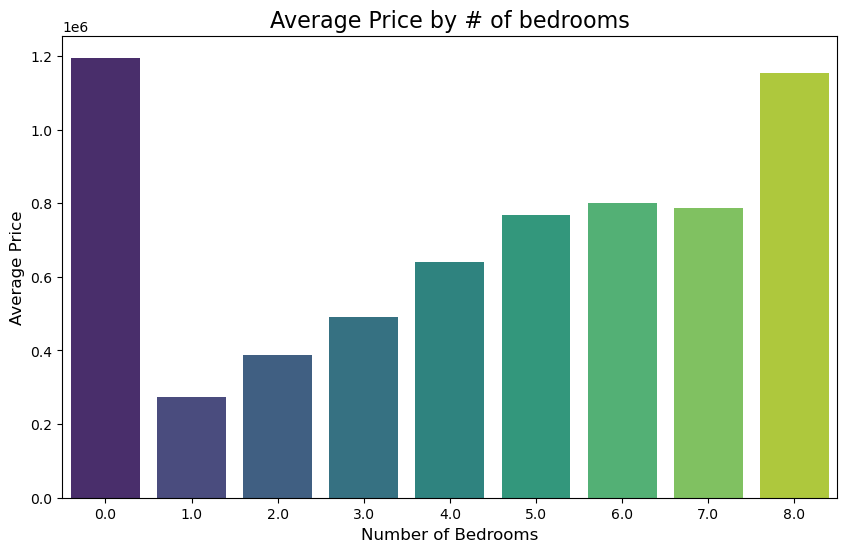

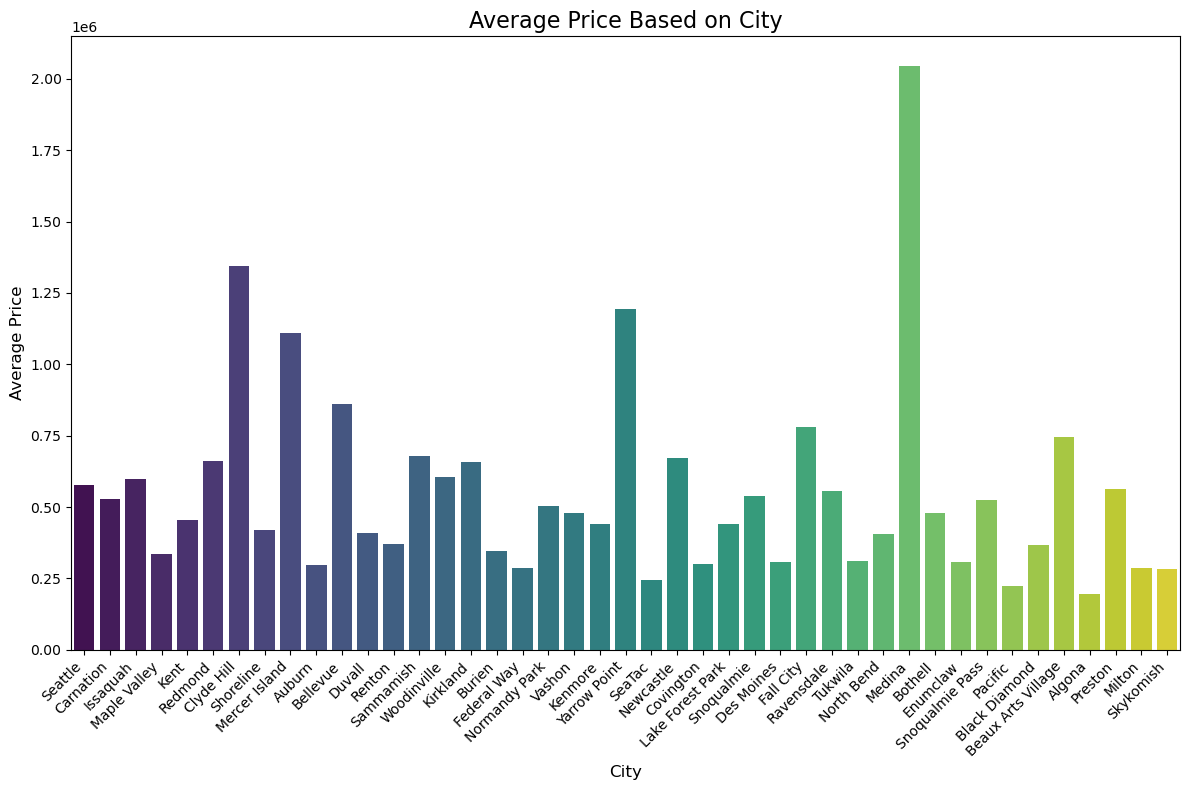

In [2]:
#Part 1: Exploratory Data Analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "Housing Prices Data Viz and ML project/USA Housing Dataset.csv"
data = pd.read_csv(file_path)

data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

print("Dataset Preview:")
print(data.head())

print("\nDataset info:")
print(data.info())

print("\nSummary Statistics:")
print(data.describe())

missing_values = data.isnull().sum()
print("Missing values:")
print(missing_values[missing_values > 0])

num_data = data.select_dtypes(include=[np.number])
print("\nNumerical Columns for Correlation:")
print(num_data.columns)

#Visualizations

#1. Distribution of house prices
plt.figure(figsize=(10,6))
sns.histplot(data['price'], kde=True, bins=50, color='blue')
plt.title('Distribution of House Prices', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.show()

#2. Correlation Heatmap
plt.figure(figsize=(12,8))
correlation_matrix = num_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

#3. Average Price by number of bedrooms
plt.figure(figsize=(10,6))
sns.barplot(x='bedrooms', y='price', data=data, errorbar=None, palette='viridis')
plt.title('Average Price by # of bedrooms', fontsize=16)
plt.xlabel('Number of Bedrooms', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.show()

#4. Geographical Distribution of prices (based on city)
plt.figure(figsize=(12,8))
sns.barplot(x='city', y='price', data=data, errorbar=None, palette='viridis')
plt.title('Average Price Based on City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Price', fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()



In [3]:
#Part 2: Data Cleaning and Preprocessing

# Check missing values
print("\nMissing Values Before Handling:")
print(data.isnull().sum())

# Fill missing numerical values with the mean
numerical_columns = data.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    data[col].fillna(data[col].mean(), inplace=True)

# Fill missing categorical values with the mode
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Verify no missing values remain
print("\nMissing Values After Handling:")
print(data.isnull().sum())



Missing Values Before Handling:
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

Missing Values After Handling:
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [4]:
# One-Hot Encode the 'city' column (example)
data = pd.get_dummies(data, columns=['city'], drop_first=True)

# Label Encode if you have other categorical features
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
if 'some_categorical_column' in data.columns:
    data['some_categorical_column'] = encoder.fit_transform(data['some_categorical_column'])

# Display data to verify encoding
print("\nData After Encoding:")
print(data.head())



Data After Encoding:
                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-09 00:00:00   376000.0       3.0       2.00         1340      1384   
1  2014-05-09 00:00:00   800000.0       4.0       3.25         3540    159430   
2  2014-05-09 00:00:00  2238888.0       5.0       6.50         7270    130017   
3  2014-05-09 00:00:00   324000.0       3.0       2.25          998       904   
4  2014-05-10 00:00:00   549900.0       5.0       2.75         3060      7015   

   floors  waterfront  view  condition  ...  city_SeaTac  city_Seattle  \
0     3.0           0     0          3  ...        False          True   
1     2.0           0     0          3  ...        False         False   
2     2.0           0     0          3  ...        False         False   
3     2.0           0     0          3  ...        False          True   
4     1.0           0     0          5  ...        False          True   

   city_Shoreline  city_Skykomish city_Snoqual

In [5]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
numerical_columns = data.select_dtypes(include=[np.number]).columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print("\nData After Scaling:")
print(data.head())



Data After Scaling:
                  date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-09 00:00:00 -0.303389 -0.443096  -0.207794    -0.839427 -0.371138   
1  2014-05-09 00:00:00  0.423116  0.663307   1.385296     1.458545  4.034632   
2  2014-05-09 00:00:00  2.888586  1.769711   5.527333     5.354651  3.214701   
3  2014-05-09 00:00:00 -0.392489 -0.443096   0.110824    -1.196657 -0.384518   
4  2014-05-10 00:00:00 -0.005419  1.769711   0.748060     0.957169 -0.214165   

     floors  waterfront      view  condition  ...  city_SeaTac  city_Seattle  \
0  2.777969   -0.086859 -0.311968  -0.666836  ...        False          True   
1  0.908378   -0.086859 -0.311968  -0.666836  ...        False         False   
2  0.908378   -0.086859 -0.311968  -0.666836  ...        False         False   
3  0.908378   -0.086859 -0.311968  -0.666836  ...        False          True   
4 -0.961214   -0.086859 -0.311968   2.281055  ...        False          True   

   city_Shoreline

In [9]:
# List object columns
object_columns = data.select_dtypes(include=['object']).columns
print("\nObject Columns in Dataset:")
print(object_columns)



Object Columns in Dataset:
Index(['date', 'street', 'statezip', 'country'], dtype='object')


In [10]:
# Iterate through object columns
for col in object_columns:
    # Handle Date Columns
    if 'date' in col.lower():
        data[col] = pd.to_datetime(data[col])  # Convert to datetime
        data['year'] = data[col].dt.year       # Extract year
        data['month'] = data[col].dt.month     # Extract month
        data['day'] = data[col].dt.day         # Extract day
        data.drop(col, axis=1, inplace=True)   # Drop the original date column
    
    # Handle Categorical Columns
    elif data[col].nunique() < 50:  # Threshold for one-hot encoding
        data = pd.get_dummies(data, columns=[col], drop_first=True)
    
    # Handle Ordinal or High Cardinality Columns
    else:
        from sklearn.preprocessing import LabelEncoder
        encoder = LabelEncoder()
        data[col] = encoder.fit_transform(data[col])

# Verify all object columns have been handled
print("\nRemaining Object Columns After Processing:")
print(data.select_dtypes(include=['object']).columns)



Remaining Object Columns After Processing:
Index([], dtype='object')


In [11]:
# Verify data types
print("\nColumn Data Types After Preprocessing:")
print(data.dtypes)

# Ensure X contains only numerical data
X = data.drop('price', axis=1)
y = data['price']

print("\nFeature Data Types:")
print(X.dtypes)



Column Data Types After Preprocessing:
price                      float64
bedrooms                   float64
bathrooms                  float64
sqft_living                float64
sqft_lot                   float64
floors                     float64
waterfront                 float64
view                       float64
condition                  float64
sqft_above                 float64
sqft_basement              float64
yr_built                   float64
yr_renovated               float64
street                       int32
statezip                     int32
city_Auburn                   bool
city_Beaux Arts Village       bool
city_Bellevue                 bool
city_Black Diamond            bool
city_Bothell                  bool
city_Burien                   bool
city_Carnation                bool
city_Clyde Hill               bool
city_Covington                bool
city_Des Moines               bool
city_Duvall                   bool
city_Enumclaw                 bool
city_Fall City 

In [12]:
from sklearn.model_selection import train_test_split

# Define target variable and features
X = data.drop('price', axis=1)  
y = data['price']  

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining and Testing Set Sizes:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")



Training and Testing Set Sizes:
X_train: (3312, 59), X_test: (828, 59)
y_train: (3312,), y_test: (828,)


In [13]:
#Part 3: Training a Baseline Model (Linear Regression)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Predict house prices on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("\nLinear Regression Model Performance:")
print(f"R² Score: {r2:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Linear Regression Model Performance:
R² Score: 0.48
Root Mean Squared Error (RMSE): 0.40


In [14]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict house prices on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

print("\nRandom Forest Model Performance:")
print(f"R² Score: {r2_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")



Random Forest Model Performance:
R² Score: 0.35
Root Mean Squared Error (RMSE): 0.45


In [16]:
# Comparison of model performance
print("\nModel Comparison:")
print(f"{'Model':<20}{'R² Score':<10}{'RMSE':<10}")
print(f"{'Linear Regression':<20}{r2:.2f}\t{rmse:.2f}")
print(f"{'Random Forest':<20}{r2_rf:.2f}\t{rmse_rf:.2f}")



Model Comparison:
Model               R² Score  RMSE      
Linear Regression   0.48	0.40
Random Forest       0.35	0.45


In [17]:
#Hyperparameter Tuning for Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Set up RandomizedSearchCV
rf_random = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=50,  
    scoring='r2',
    cv=3,       # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1   
)

# Fit the model to find the best parameters
rf_random.fit(X_train, y_train)

# Display the best parameters
print("\nBest Hyperparameters:")
print(rf_random.best_params_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits

Best Hyperparameters:
{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30}


In [18]:
# Train the model with the best hyperparameters
best_rf_model = rf_random.best_estimator_

# Predict on the test set
y_pred_rf_tuned = best_rf_model.predict(X_test)

# Evaluate the tuned model
from sklearn.metrics import r2_score, mean_squared_error

r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)
rmse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned, squared=False)

print("\nTuned Random Forest Model Performance:")
print(f"R² Score: {r2_rf_tuned:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf_tuned:.2f}")



Tuned Random Forest Model Performance:
R² Score: 0.51
Root Mean Squared Error (RMSE): 0.39


In [20]:
print("\nModel Performance Comparison:")
print(f"{'Model':<25}{'R² Score':<10}{'RMSE':<10}")
print(f"{'Linear Regression':<25}{0.48:.2f}\t{0.40:.2f}")
print(f"{'Random Forest (Baseline)':<25}{0.35:.2f}\t{0.45:.2f}")
print(f"{'Random Forest (Tuned)':<25}{r2_rf_tuned:.2f}\t{rmse_rf_tuned:.2f}")



Model Performance Comparison:
Model                    R² Score  RMSE      
Linear Regression        0.48	0.40
Random Forest (Baseline) 0.35	0.45
Random Forest (Tuned)    0.51	0.39


In [ ]:
# We choose the Tuned Random Forest Model as it provides us with the maximum performance.

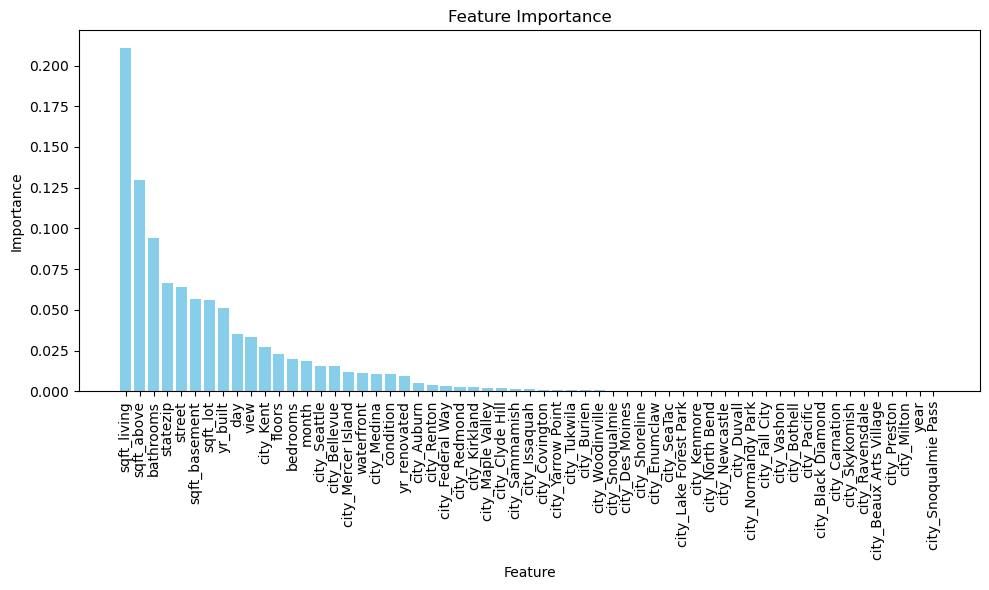

In [21]:
#Part 4: Visualization

#1) Feature Importance
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importance
importances = best_rf_model.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align='center', color='skyblue')
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.title("Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


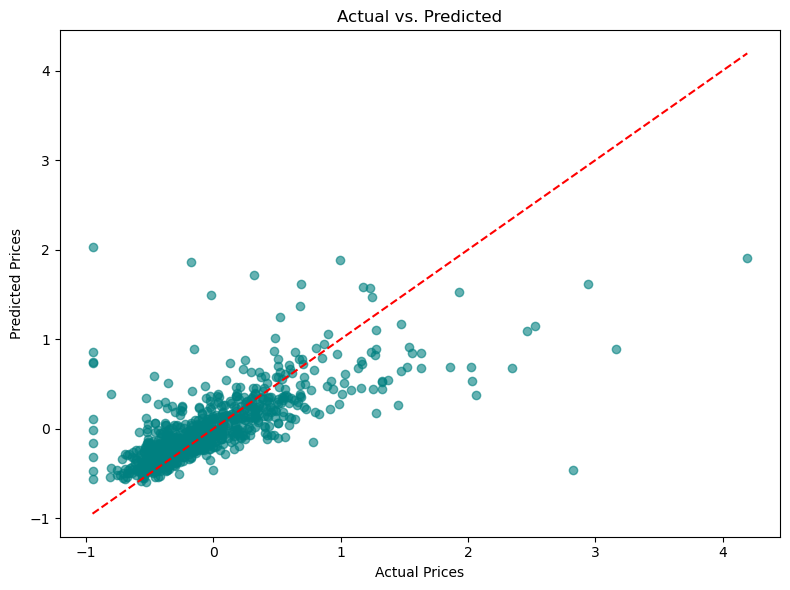

In [22]:
# Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf_tuned, alpha=0.6, color='teal')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Actual vs. Predicted")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.tight_layout()
plt.show()


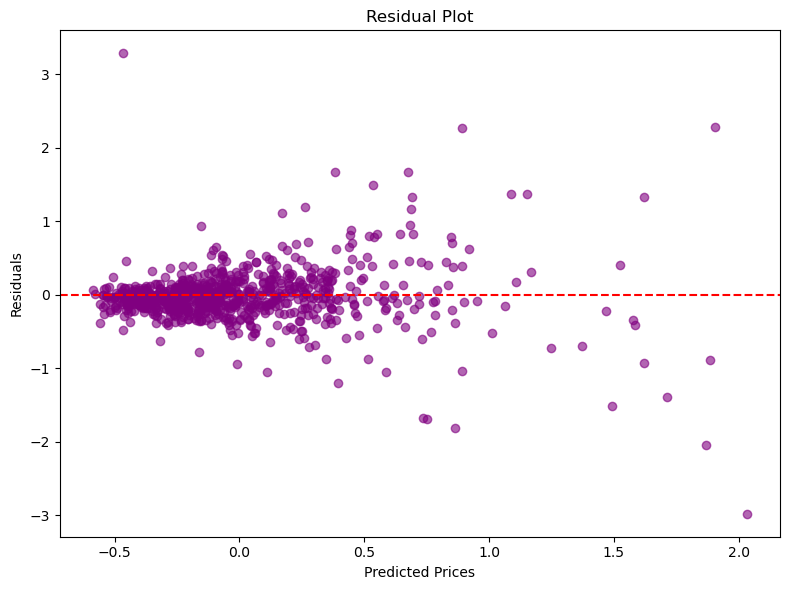

In [23]:
# Residual Plot
residuals = y_test - y_pred_rf_tuned

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf_tuned, residuals, alpha=0.6, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()


In [24]:
import joblib

# trained model
joblib.dump(best_rf_model, "tuned_random_forest_model.pkl")


['tuned_random_forest_model.pkl']